In [2]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [3]:
engine = create_engine("sqlite:///mta_data.db")

In [4]:
insp = inspect(engine)
print(insp.get_table_names())

['mta_data']


In [5]:
df = pd.read_sql('SELECT * FROM mta_data;', engine)

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,00:00:00,REGULAR,7625998,2609113
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,04:00:00,REGULAR,7626014,2609117
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,08:00:00,REGULAR,7626024,2609135
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,12:00:00,REGULAR,7626086,2609191
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,16:00:00,REGULAR,7626206,2609221


In [7]:
df.shape

(2932345, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2932345 entries, 0 to 2932344
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 246.1+ MB


In [9]:
df.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [10]:
import datetime

df['DATE_TIME'] = df['DATE'] + ' ' + df['TIME']
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
DATE_TIME    datetime64[ns]
dtype: object

In [11]:
df['UNIQUE_ID'] = df['C/A'] + ' ' + df['UNIT'] + ' ' + df['SCP']

In [12]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,UNIQUE_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,00:00:00,REGULAR,7625998,2609113,2021-08-28 00:00:00,A002 R051 02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,04:00:00,REGULAR,7626014,2609117,2021-08-28 04:00:00,A002 R051 02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,08:00:00,REGULAR,7626024,2609135,2021-08-28 08:00:00,A002 R051 02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,12:00:00,REGULAR,7626086,2609191,2021-08-28 12:00:00,A002 R051 02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,16:00:00,REGULAR,7626206,2609221,2021-08-28 16:00:00,A002 R051 02-00-00


In [13]:
df.DESC.value_counts()

REGULAR       2918407
RECOVR AUD      13938
Name: DESC, dtype: int64

In [38]:
min_entries = df.groupby(['UNIQUE_ID','STATION','LINENAME','DATE']).ENTRIES.min()
max_entries = df.groupby(['UNIQUE_ID','STATION','LINENAME','DATE']).ENTRIES.max()
daily_entries = max_entries - min_entries

min_exits = df.groupby(['UNIQUE_ID','STATION','LINENAME','DATE']).EXITS.min()
max_exits = df.groupby(['UNIQUE_ID','STATION','LINENAME','DATE']).EXITS.max()
daily_exits = max_exits - min_exits

In [39]:
daily_entries.head()

UNIQUE_ID           STATION  LINENAME  DATE      
A002 R051 02-00-00  59 ST    NQR456W   05/29/2021    287
                                       05/30/2021    197
                                       05/31/2021    281
                                       06/01/2021    525
                                       06/02/2021    504
Name: ENTRIES, dtype: int64

In [40]:
type(daily_entries)

pandas.core.series.Series

In [41]:
daily_traffic = pd.merge(daily_entries.reset_index(), daily_exits.reset_index(), how='outer')

In [42]:
daily_traffic.head()

,UNIQUE_ID,STATION,LINENAME,DATE,ENTRIES,EXITS
0,A002 R051 02-00-00,59 ST,NQR456W,05/29/2021,287,114
1,A002 R051 02-00-00,59 ST,NQR456W,05/30/2021,197,97
2,A002 R051 02-00-00,59 ST,NQR456W,05/31/2021,281,81
3,A002 R051 02-00-00,59 ST,NQR456W,06/01/2021,525,266
4,A002 R051 02-00-00,59 ST,NQR456W,06/02/2021,504,274


In [43]:
daily_traffic.describe()

,ENTRIES,EXITS
count,4.894320e+05,4.894320e+05
mean,1.197666e+04,1.999997e+04
std,3.579323e+06,4.805893e+06
min,0.000000e+00,0.000000e+00
25%,7.600000e+01,7.000000e+01
50%,2.390000e+02,2.270000e+02
75%,4.740000e+02,5.100000e+02
max,1.889997e+09,2.133741e+09


In [44]:
type(daily_traffic)

pandas.core.frame.DataFrame

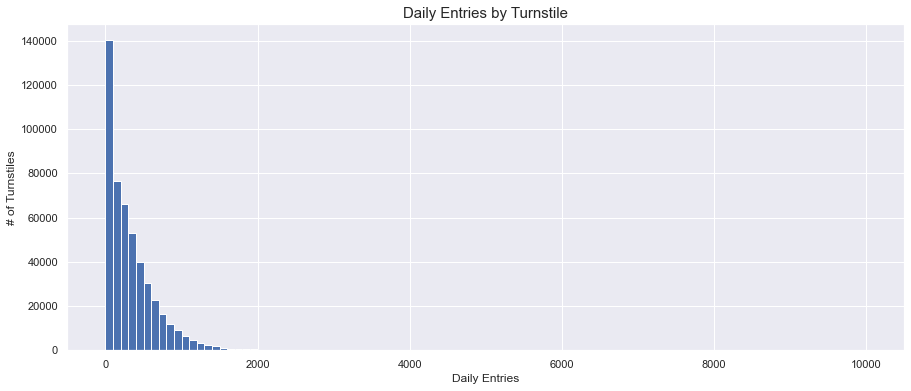

In [187]:
plt.figure(figsize = [15,6])
plt.hist(daily_traffic["ENTRIES"],bins = 100, range = (0,10000))
plt.xlabel('Daily Entries')
plt.ylabel('# of Turnstiles')
plt.title('Daily Entries by Turnstile', fontsize = 15)
plt.savefig('Turnstile Entries Skew', bbox_inches='tight', dpi=200, facecolor = 'w');

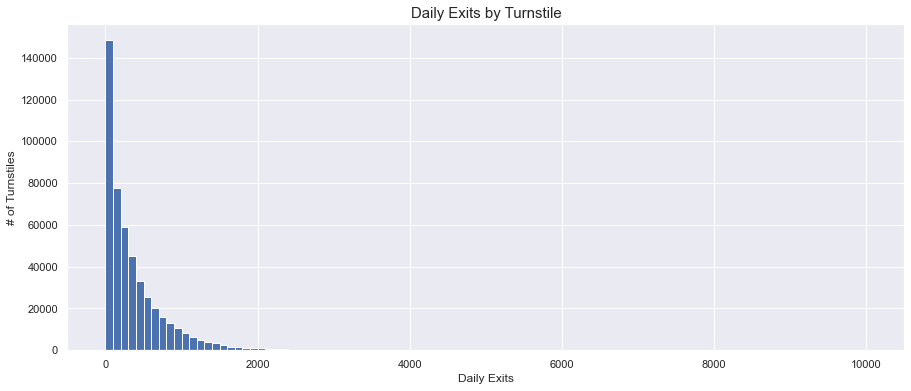

In [188]:
plt.figure(figsize = [15,6])
plt.hist(daily_traffic["EXITS"],bins = 100, range = (0,10000))
plt.xlabel('Daily Exits')
plt.ylabel('# of Turnstiles')
plt.title('Daily Exits by Turnstile', fontsize = 15)
plt.savefig('Turnstile Exits Skew', bbox_inches='tight', dpi=200, facecolor = 'w');

In [47]:
daily_traffic[daily_traffic["ENTRIES"] > 4000].groupby(["UNIQUE_ID", "STATION"]).size()
#145 of 4.89mm turnstiles on a given day have values greater than 4000

UNIQUE_ID           STATION        
A013 R081 01-06-01  49 ST              1
A014 R081 02-00-00  49 ST              1
A049 R088 02-00-02  CORTLANDT ST       1
A050 R088 00-05-01  CORTLANDT ST       1
A058 R001 01-00-01  WHITEHALL S-FRY    1
                                      ..
R612 R057 01-05-00  ATL AV-BARCLAY     1
R621 R060 00-06-00  EASTN PKWY-MUSM    1
R633 R068 00-00-01  VAN SICLEN AV      1
R646 R110 01-00-02  FLATBUSH AV-B.C    1
S101 R070 00-00-02  ST. GEORGE         6
Length: 145, dtype: int64

In [48]:
daily_traffic[daily_traffic["EXITS"] > 4000].groupby(["UNIQUE_ID", "STATION"]).size()
#131 of 4.89mm turnstiles on a given day have values greater than 4000

UNIQUE_ID           STATION        
A014 R081 02-00-00  49 ST              1
A034 R170 03-00-00  14 ST-UNION SQ     1
A049 R088 02-00-02  CORTLANDT ST       1
A050 R088 00-05-01  CORTLANDT ST       1
A058 R001 01-00-01  WHITEHALL S-FRY    1
                                      ..
R610 R057 00-03-02  ATL AV-BARCLAY     1
R612 R057 01-05-00  ATL AV-BARCLAY     1
R621 R060 00-06-00  EASTN PKWY-MUSM    1
R633 R068 00-00-01  VAN SICLEN AV      1
R646 R110 01-00-02  FLATBUSH AV-B.C    1
Length: 131, dtype: int64

In [49]:
daily_traffic = daily_traffic[(daily_traffic.ENTRIES < 10000) & (daily_traffic.EXITS < 10000)

In [50]:
daily_traffic.describe().round(2)

,ENTRIES,EXITS
count,489240.00,489240.00
mean,326.01,366.48
std,330.86,432.14
min,0.00,0.00
25%,76.00,69.00
50%,239.00,227.00
75%,474.00,510.00
max,8962.00,9436.00


In [51]:
daily_traffic['TRAFFIC'] = daily_traffic['ENTRIES'] + daily_traffic['EXITS']
daily_traffic.head()

,UNIQUE_ID,STATION,LINENAME,DATE,ENTRIES,EXITS,TRAFFIC
0,A002 R051 02-00-00,59 ST,NQR456W,05/29/2021,287,114,401
1,A002 R051 02-00-00,59 ST,NQR456W,05/30/2021,197,97,294
2,A002 R051 02-00-00,59 ST,NQR456W,05/31/2021,281,81,362
3,A002 R051 02-00-00,59 ST,NQR456W,06/01/2021,525,266,791
4,A002 R051 02-00-00,59 ST,NQR456W,06/02/2021,504,274,778


In [61]:
station_daily_entries = daily_traffic.groupby(["STATION", "LINENAME", "DATE"])[['ENTRIES']].sum().reset_index()
station_daily_exits = daily_traffic.groupby(["STATION", "LINENAME", "DATE"])[['EXITS']].sum().reset_index()
station_daily = daily_traffic.groupby(["STATION", "LINENAME", "DATE"])[['TRAFFIC']].sum().reset_index()

In [62]:
station_daily_entries['DAY_OF_WEEK'] = pd.to_datetime(station_daily_entries['DATE']).dt.day_name()
station_daily_entries['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_entries['DATE']).dt.isocalendar().week

station_daily_exits['DAY_OF_WEEK'] = pd.to_datetime(station_daily_exits['DATE']).dt.day_name()
station_daily_exits['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_exits['DATE']).dt.isocalendar().week

station_daily['DAY_OF_WEEK'] = pd.to_datetime(station_daily['DATE']).dt.day_name()
station_daily['WEEK_OF_YEAR'] = pd.to_datetime(station_daily['DATE']).dt.isocalendar().week

In [63]:
station_daily.head()

,STATION,LINENAME,DATE,TRAFFIC,DAY_OF_WEEK,WEEK_OF_YEAR
0,1 AV,L,05/29/2021,12626,Saturday,21
1,1 AV,L,05/30/2021,10383,Sunday,21
2,1 AV,L,05/31/2021,11677,Monday,22
3,1 AV,L,06/01/2021,17636,Tuesday,22
4,1 AV,L,06/02/2021,18526,Wednesday,22


In [83]:
station_total_ent_linename = station_daily_entries.groupby(["STATION", "LINENAME"])['ENTRIES'].sum() \
    .reset_index() \
    .sort_values('ENTRIES', ascending=False)

station_total_ex_linename = station_daily_exits.groupby(["STATION", "LINENAME"])['EXITS'].sum() \
    .reset_index() \
    .sort_values('EXITS', ascending=False)

station_total_linename = station_daily.groupby(["STATION", "LINENAME"])['TRAFFIC'].sum() \
    .reset_index() \
    .sort_values('TRAFFIC', ascending=False)



station_total_ent = station_daily_entries.groupby(["STATION"])['ENTRIES'].sum() \
    .reset_index() \
    .sort_values('ENTRIES', ascending=False)

station_total_ex = station_daily_exits.groupby(["STATION"])['EXITS'].sum() \
    .reset_index() \
    .sort_values('EXITS', ascending=False)

station_total = station_daily.groupby(["STATION"])['TRAFFIC'].sum() \
    .reset_index() \
    .sort_values('TRAFFIC', ascending=False)

In [196]:
station_total_linename.head(20)

,STATION,LINENAME,TRAFFIC
89,34 ST-HERALD SQ,BDFMNQRW,6793485
312,GRD CNTRL-42 ST,4567S,6692149
102,42 ST-PORT AUTH,ACENQRS1237W,5015715
93,34 ST-PENN STA,ACE,4609250
289,FLUSHING-MAIN,7,4274983
28,14 ST-UNION SQ,LNQR456W,3784903
339,JKSN HT-ROOSVLT,EFMR7,3514302
302,FULTON ST,2345ACJZ,3179712
404,PATH NEW WTC,1,3125067
156,86 ST,456,3046842


In [194]:
station_total.head(15)

,STATION,TRAFFIC
61,34 ST-PENN STA,8978720
59,34 ST-HERALD SQ,6793485
233,GRD CNTRL-42 ST,6692149
110,86 ST,5968036
14,14 ST-UNION SQ,5822908
68,42 ST-PORT AUTH,5687706
46,23 ST,5398562
9,125 ST,5234886
226,FULTON ST,4795110
353,TIMES SQ-42 ST,4767529


In [279]:
station_total_median = station_daily.groupby(["STATION", "LINENAME"])['TRAFFIC'].median() \
    .reset_index() \
    .sort_values('TRAFFIC', ascending=False)

station_total_median.head(10)

,STATION,LINENAME,TRAFFIC
312,GRD CNTRL-42 ST,4567S,78586.0
89,34 ST-HERALD SQ,BDFMNQRW,76957.5
102,42 ST-PORT AUTH,ACENQRS1237W,57045.5
93,34 ST-PENN STA,ACE,51877.5
289,FLUSHING-MAIN,7,47745.5
28,14 ST-UNION SQ,LNQR456W,40063.5
339,JKSN HT-ROOSVLT,EFMR7,38905.0
302,FULTON ST,2345ACJZ,36815.0
404,PATH NEW WTC,1,35458.0
106,47-50 STS ROCK,BDFM,34859.0


In [280]:
station_total_mean = station_daily.groupby(["STATION", "LINENAME"])['TRAFFIC'].mean() \
    .reset_index() \
    .sort_values('TRAFFIC', ascending=False)

station_total_mean.head(10).round(2)
#Neither mean nor median produces meaningfully different results 

,STATION,LINENAME,TRAFFIC
89,34 ST-HERALD SQ,BDFMNQRW,69321.28
312,GRD CNTRL-42 ST,4567S,68287.23
102,42 ST-PORT AUTH,ACENQRS1237W,51180.77
93,34 ST-PENN STA,ACE,47033.16
289,FLUSHING-MAIN,7,43622.28
28,14 ST-UNION SQ,LNQR456W,38621.46
339,JKSN HT-ROOSVLT,EFMR7,35860.22
302,FULTON ST,2345ACJZ,32446.04
404,PATH NEW WTC,1,31888.44
156,86 ST,456,31090.22


In [119]:
day_of_week_total = station_daily.groupby('DAY_OF_WEEK')['TRAFFIC'].sum() \
    .reset_index() \
    .sort_values('TRAFFIC', ascending=False)

day_of_week_total.head(10)

,DAY_OF_WEEK,TRAFFIC
6,Wednesday,56584162
5,Tuesday,55793632
4,Thursday,55083436
0,Friday,54885311
1,Monday,49791495
2,Saturday,37415419
3,Sunday,29240846


In [138]:
day_of_week_total_station = station_daily.groupby(['STATION','DAY_OF_WEEK'])['TRAFFIC'].sum() \
    .reset_index() \
    .sort_values('TRAFFIC', ascending=False)

day_of_week_total_station.head(50)

,STATION,DAY_OF_WEEK,TRAFFIC
433,34 ST-PENN STA,Wednesday,1467245
427,34 ST-PENN STA,Friday,1462148
432,34 ST-PENN STA,Tuesday,1457573
431,34 ST-PENN STA,Thursday,1451442
428,34 ST-PENN STA,Monday,1315656
1637,GRD CNTRL-42 ST,Wednesday,1193471
1636,GRD CNTRL-42 ST,Tuesday,1178434
1635,GRD CNTRL-42 ST,Thursday,1161370
419,34 ST-HERALD SQ,Wednesday,1125452
418,34 ST-HERALD SQ,Tuesday,1120035


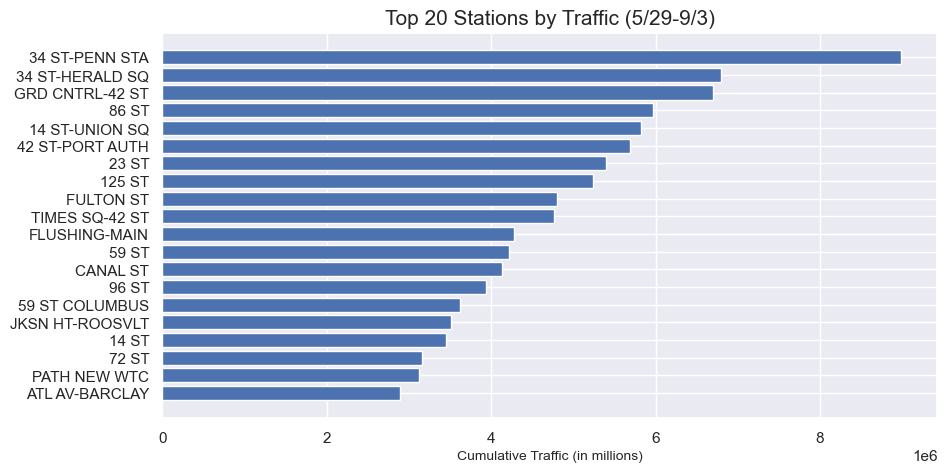

In [282]:
plt.figure(figsize=(10,5))
plt.barh(y=station_total['STATION'][:20], width=station_total['TRAFFIC'][:20])
plt.xlabel("Cumulative Traffic (in millions)", fontsize = 10)
plt.gca().invert_yaxis()
plt.title('Top 20 Stations by Traffic (5/29-9/3)', fontsize = 15)
plt.savefig('twenty_busiest_stations.png', bbox_inches='tight', dpi=200, facecolor = 'w');

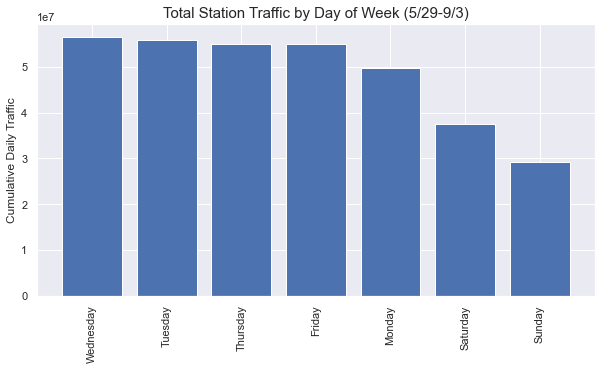

In [191]:
plt.figure(figsize=(10,5))
plt.bar(x=day_of_week_total['DAY_OF_WEEK'], height=day_of_week_total['TRAFFIC'])
plt.xticks(rotation=90)
plt.ylabel("Cumulative Daily Traffic", fontsize = 12)
plt.title('Total Station Traffic by Day of Week (5/29-9/3)', fontsize = 15)
plt.savefig('Busiest Days (Matplot).png', bbox_inches='tight', dpi=200, facecolor = 'w');

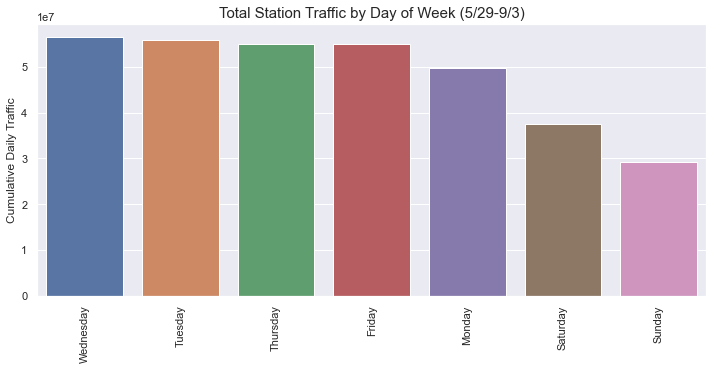

In [142]:
sns.barplot(x = day_of_week_total['DAY_OF_WEEK'],y=day_of_week_total['TRAFFIC'],data=day_of_week_total)
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.ylabel("Cumulative Daily Traffic", fontsize = 12)
plt.title('Total Station Traffic by Day of Week (5/29-9/3)', fontsize = 15)
plt.savefig('Busiest Days.png', bbox_inches='tight', dpi=200, facecolor = 'w');

In [201]:
mask = ((station_daily["STATION"] == "34 ST-PENN STA") |
        (station_daily["STATION"] == "34 ST-HERALD SQ") |
        (station_daily["STATION"] == "GRD CNTRL-42 ST") |
        (station_daily["STATION"] == "14 ST-UNION SQ") |
        (station_daily["STATION"] == "42 ST-PORT AUTH") |
        (station_daily["STATION"] == "FULTON ST") |
        (station_daily["STATION"] == "TIMES SQ-42 ST"))

In [208]:
station_daily_top_seven = station_daily[mask]
station_daily_top_seven

,STATION,LINENAME,DATE,TRAFFIC,DAY_OF_WEEK,WEEK_OF_YEAR
2646,14 ST-UNION SQ,456LNQRW,05/29/2021,14873,Saturday,21
2647,14 ST-UNION SQ,456LNQRW,05/30/2021,11446,Sunday,21
2648,14 ST-UNION SQ,456LNQRW,05/31/2021,14358,Monday,22
2649,14 ST-UNION SQ,456LNQRW,06/01/2021,21586,Tuesday,22
2650,14 ST-UNION SQ,456LNQRW,06/02/2021,22632,Wednesday,22
...,...,...,...,...,...,...
44065,TIMES SQ-42 ST,ACENQRS1237W,08/30/2021,11949,Monday,35
44066,TIMES SQ-42 ST,ACENQRS1237W,08/31/2021,12807,Tuesday,35
44067,TIMES SQ-42 ST,ACENQRS1237W,09/01/2021,11932,Wednesday,35
44068,TIMES SQ-42 ST,ACENQRS1237W,09/02/2021,8917,Thursday,35


In [257]:
station_top_seven = station_daily_top_seven.groupby(['STATION','DAY_OF_WEEK'])['TRAFFIC'].sum() \
    .reset_index() \
    .sort_values(['STATION', 'DAY_OF_WEEK'], ascending=False)
station_top_seven.head()

,STATION,DAY_OF_WEEK,TRAFFIC
48,TIMES SQ-42 ST,Wednesday,779328
47,TIMES SQ-42 ST,Tuesday,769763
46,TIMES SQ-42 ST,Thursday,764959
45,TIMES SQ-42 ST,Sunday,459316
44,TIMES SQ-42 ST,Saturday,581464


In [258]:
seven_pivot = station_top_seven.pivot("DAY_OF_WEEK","STATION", "TRAFFIC")
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seven_flat = seven_pivot.reindex(days)
seven_flat.head(7)

STATION,14 ST-UNION SQ,34 ST-HERALD SQ,34 ST-PENN STA,42 ST-PORT AUTH,FULTON ST,GRD CNTRL-42 ST,TIMES SQ-42 ST
DAY_OF_WEEK,,,,,,,
Monday,803455,987922,1315656,828962,705876,997867,688538
Tuesday,900641,1120035,1457573,920716,812251,1178434,769763
Wednesday,943609,1125452,1467245,925079,832906,1193471,779328
Thursday,895115,1103270,1451442,923049,817051,1161370,764959
Friday,938416,1117567,1462148,935767,785076,1076159,724161
Saturday,767418,749013,997380,648092,478622,615109,581464
Sunday,574254,590226,827276,506041,363328,469739,459316


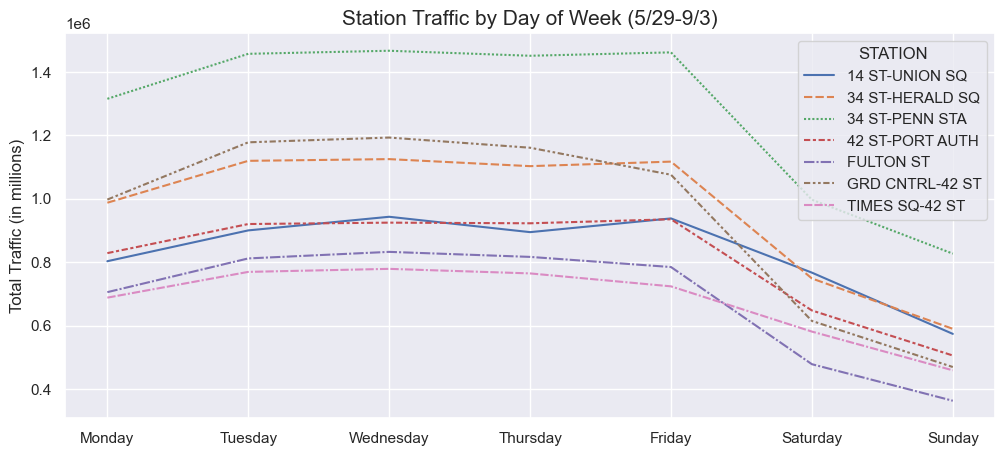

In [273]:
sns.lineplot(data = seven_flat)
sns.set(rc={'figure.figsize':(12,5)})
plt.xlabel(" ")
plt.ylabel("Total Traffic (in millions)", fontsize = 12)
plt.title('Station Traffic by Day of Week (5/29-9/3)', fontsize = 15);
plt.savefig('Top Seven.png', bbox_inches='tight', dpi=200, facecolor = 'w');

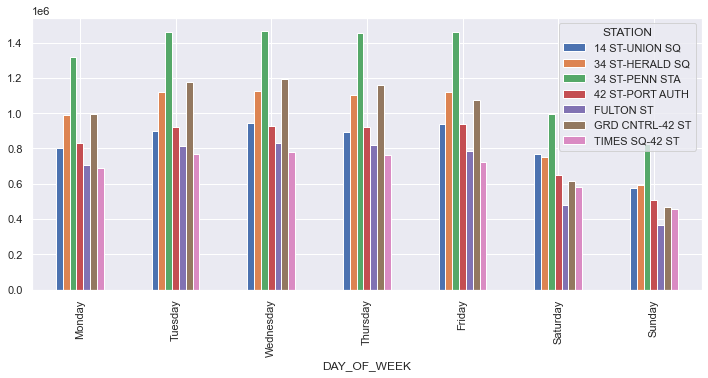

In [252]:
seven_flat.plot(kind='bar');